In [5]:
import numpy as np
from Parser import Parser
import music21
import pypianoroll
import matplotlib.pyplot as plt

In [6]:
files = Parser('lpd',subset=0.001,lazy=False)

Number of files: 115
Loading track 115/115
Loading finished with 5020 samples


In [4]:
# lazy evaluation testing
# only if lazy=True
counter = 0
for i in files.tracks:
    print("Processing: %i"%counter,end='\r')
    counter += 1

Processing: 4845

In [5]:
files.play(2100)

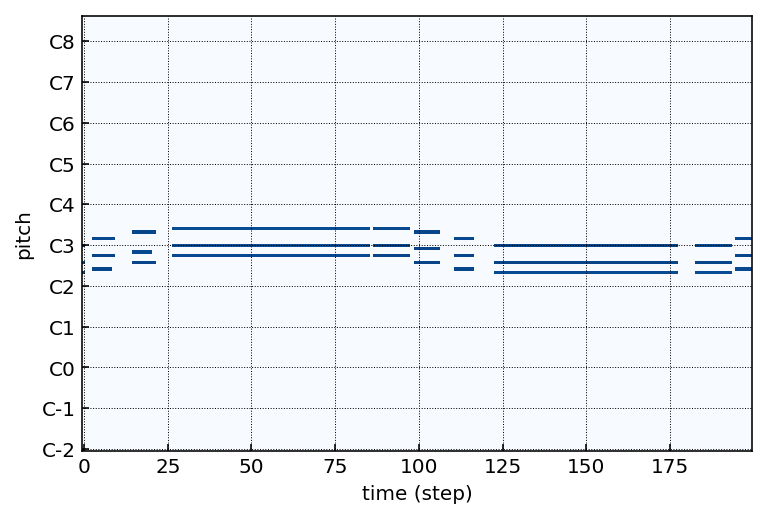

In [8]:
files.plot(2100)

In [21]:
files.tracks[2100][30]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 115,   0,   0, 113,   0,   0,   0,   0,
       113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [1]:
import tensorflow as tf
import keras
from Generator import Generator

Using TensorFlow backend.


In [25]:
training_generator = Generator('lpd',subset=0.8)

model = keras.Sequential()
model.add(keras.layers.LSTM(10,input_shape=(200,128)))
model.add(keras.layers.Dense(128,activation='linear'))

model.compile(loss='mse',optimizer='adam')

model.fit_generator(generator=training_generator,
                    use_multiprocessing=True,
                    epochs=1,
                    workers=2)

Epoch 1/1
2303/2303 [==============================] - 3064s 1s/step - loss: 72.99301


KeyboardInterrupt: 

In [ ]:
model.save('models/simple.h5')

In [30]:
prediction = model.predict(files.tracks[2100].reshape(1,200,128))
prediction2 = model.predict(files.tracks[1000].reshape(1,200,128))

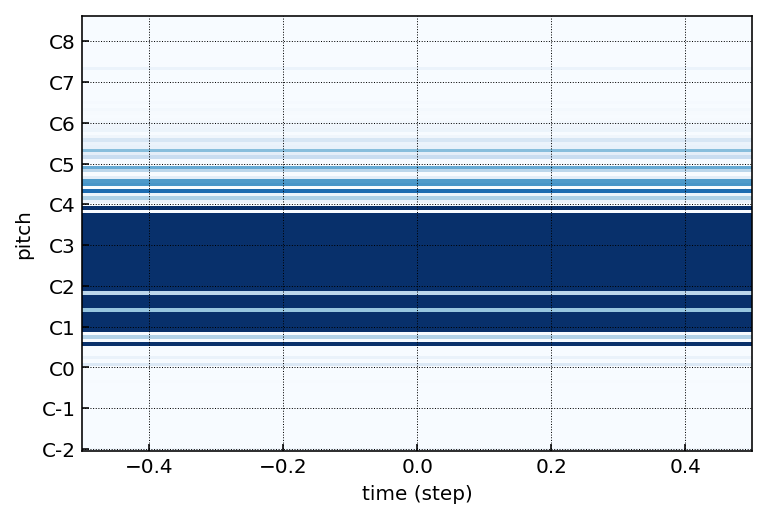

In [33]:
pypianoroll.Track(pianoroll=prediction).plot()
plt.show()

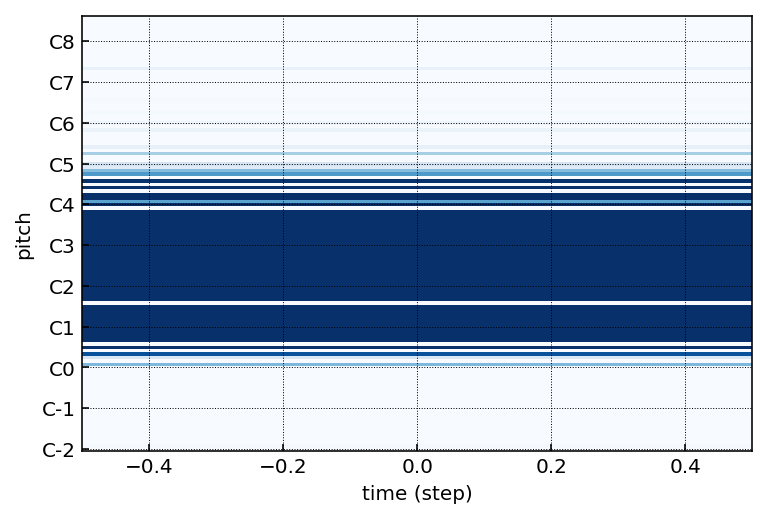

In [34]:
pypianoroll.Track(pianoroll=prediction2).plot()
plt.show()

In [37]:
init = files.tracks[2100].reshape(1,200,128)
clip = np.empty([200,128])
for i in range(200):
    prediction = model.predict(init)
    clip[i,] = prediction
    init = np.roll(init,(0,-1,0))
    init[0,199,] = prediction

In [42]:
def midi_play(midi_file):
    mi = music21.midi.MidiFile()
    mi.open(midi_file)
    mi.read()
    mi.close()
    out = music21.midi.translate.midiFileToStream(mi)
    out.show('midi')

midi_file = 'midi/tmp2.mid'
pypianoroll.Multitrack(tracks=[pypianoroll.Track(pianoroll=clip)]).write(midi_file)
midi_play(midi_file)